In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Parameters
S = 2940
dT = 1/12
sigma = 0.157
r = 0.08
y = 0.0198

In [75]:
def std_normal_matrix(num_paths, num_years):
    
    mat = np.random.normal(size = (num_paths, num_years*12))
    
    return mat

In [76]:
def generate_stock_prices(S, dT, sigma, r, y, std_norm_sequence):
    
    stocks = []
    for i in range(0,len(std_norm_sequence)):
        
        stock_process = []
        stock_process.append(S)
        
        for j in range(0,len(std_norm_sequence[i])):
                
            next_stock = stock_process[j]*np.exp((r-y-(sigma**2)/2)*dT + sigma*np.sqrt(dT)*std_norm_sequence[i][j])
            stock_process.append(next_stock)
                
        stocks.append(stock_process)
        
    return stocks

In [77]:
normals = std_normal_matrix(1000, 5)

In [78]:
stocks_processes = generate_stock_prices(S, dT, sigma, r, y, normals)

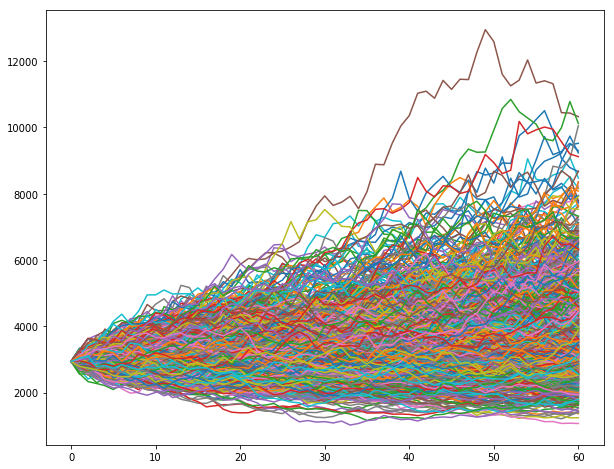

In [80]:
plt.figure(figsize=(10,8))
for i in stocks_processes:
    plt.plot(i)

plt.show()

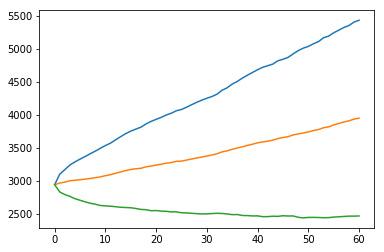

In [81]:
std = np.std(stocks_processes, axis =0)
mean = np.mean(stocks_processes, axis=0)
plt.plot(mean+std)
plt.plot(mean)
plt.plot(mean-std)

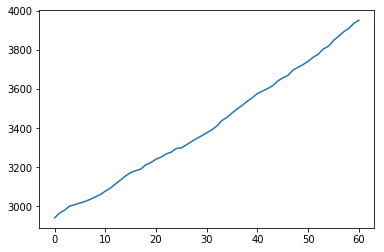

In [82]:
plt.plot(mean)